# Tarea - escalamiento y transformación
En el archivo `Escalamiento.xlsx` se encuentran dos variables, las cuales se pretenden analizar para una posterior predicción.

Se entrenará una red neuronal con la variable $x_1$ usando una función de activación sigmoidal unipolar, y la variable $x_2$ se usará para entrenar una red neuronal con una función de activación de tangente hiperbólica.

1. Transforme cada variable usando una función de potencia, con el fin de maximizar la probabilidad de obtener una distribución Normal.

2. Use el escalamiento adecuado para cada variable con la finalidad de que la red neuronal opere en el rango de cada función de activación.

In [1]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

C:\Users\maria\AppData\Local\Temp\ipykernel_19776\3799135172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
ruta = 'C:/Users/maria/Desktop/Segundo_periodo/ING_CARACT/'
df=pd.read_csv(ruta+'Escalamiento.csv')
df

,x1,x2
0,6050000,5390000.0
1,4720000,700000.0
2,4460000,10140000.0
3,34740000,6600000.0
4,1910000,3390000.0
...,...,...
3282,13150000,7810000.0
3283,8500000,14790000.0
3284,11030000,8400000.0
3285,21330000,2010000.0


In [4]:
x1_transformed, lambda_x1 = stats.boxcox(df['x1'])
x2_transformed, lambda_x2 = stats.boxcox(df['x2'])

df['x1_transformed'] = x1_transformed
df['x2_transformed'] = x2_transformed

normality_test_x1 = stats.shapiro(x1_transformed)
normality_test_x2 = stats.shapiro(x2_transformed)

print("Estadístico de Shapiro-Wilk para x1_transformed:", normality_test_x1.statistic)
print("Valor p para x1_transformed:", normality_test_x1.pvalue)

print("Estadístico de Shapiro-Wilk para x2_transformed:", normality_test_x2.statistic)
print("Valor p para x2_transformed:", normality_test_x2.pvalue)

Estadístico de Shapiro-Wilk para x1_transformed: 0.9916851759496491
Valor p para x1_transformed: 6.734690539851394e-13
Estadístico de Shapiro-Wilk para x2_transformed: 0.9825922822781912
Valor p para x2_transformed: 1.1082791677423585e-19


In [5]:
df

,x1,x2,x1_transformed,x2_transformed
0,6050000,5390000.0,33.696026,67.199629
1,4720000,700000.0,32.718445,46.894491
2,4460000,10140000.0,32.498317,74.937285
3,34740000,6600000.0,41.221571,69.595589
4,1910000,3390000.0,29.332126,61.994606
...,...,...,...,...
3282,13150000,7810000.0,36.895595,71.646397
3283,8500000,14790000.0,35.070267,79.942249
3284,11030000,8400000.0,36.151703,72.550719
3285,21330000,2010000.0,39.003022,56.568032


In [6]:
scaler_x1 = MinMaxScaler()
x1_scaled = scaler_x1.fit_transform(x1_transformed.reshape(-1, 1))

In [7]:
scaler_x2 = MinMaxScaler(feature_range=(-1, 1))
x2_scaled = scaler_x2.fit_transform(x2_transformed.reshape(-1, 1))

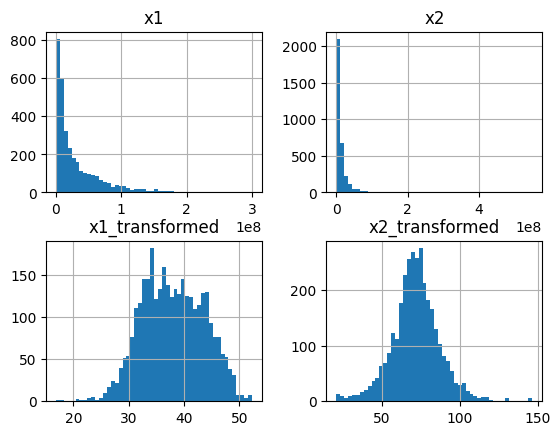

In [8]:
H=df.hist(bins=50)
